In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


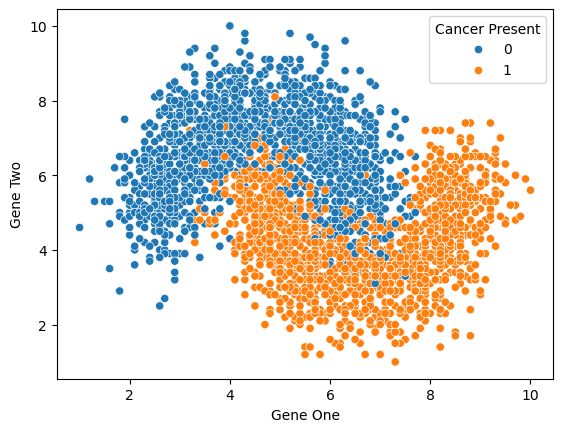

In [4]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df)
plt.show()

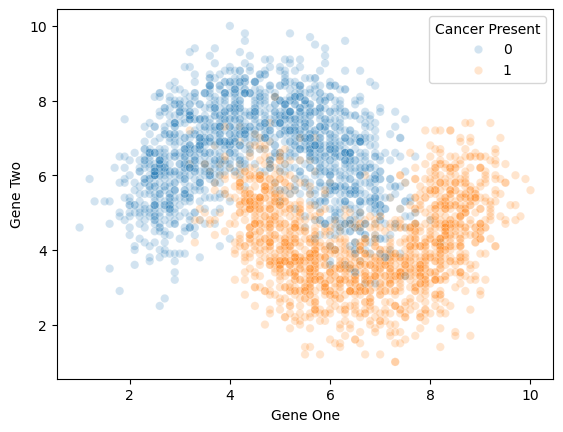

In [5]:
#if we want to light the scatterplot foe the better visvalization than we use alpha =0.2
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha= 0.2)
plt.show()

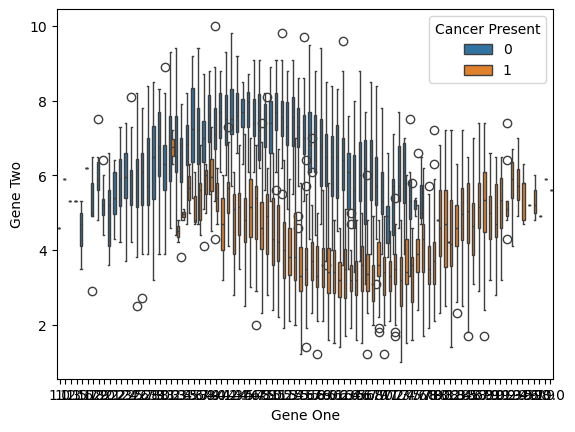

In [6]:
sns.boxplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=df.drop('Cancer Present', axis=1)
y= df['Cancer Present']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [10]:
len(X_train),len(X_test),len(y_train),len(y_test)

(2100, 900, 2100, 900)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
model=KNeighborsClassifier()
model

KNeighborsClassifier()

In [13]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
y_pred= model.predict(X_test)

### Model Evaluation

In [15]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [16]:
confusion_matrix(y_test,y_pred)

array([[441,  29],
       [ 32, 398]], dtype=int64)

In [17]:
accuracy_score(y_test,y_pred)

0.9322222222222222

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       470
           1       0.93      0.93      0.93       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



In [19]:
# Create an empty list test_error_rate
# Run a for loop through values of k 1 to 29
    # create instance of KNN with hyperparameter k
    # fit the model
    # calculate test_error_rates for each k using 1-accuracy score
    # append the calculate error rates to the test_error_rate list
    # return the create list 

In [30]:
test_error_rate = [] 
for k in range(1,30):
    model_1 = KNeighborsClassifier(n_neighbors=k)
    model_1.fit(X_train, y_train)

    y_pred_test = model_1.predict(X_test)
    test_error = round(1- accuracy_score(y_test, y_pred_test), 2)
    test_error_rate.append(test_error)

print(test_error_rate)

[0.1, 0.1, 0.07, 0.07, 0.07, 0.07, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.05, 0.06, 0.06, 0.05, 0.06, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06]


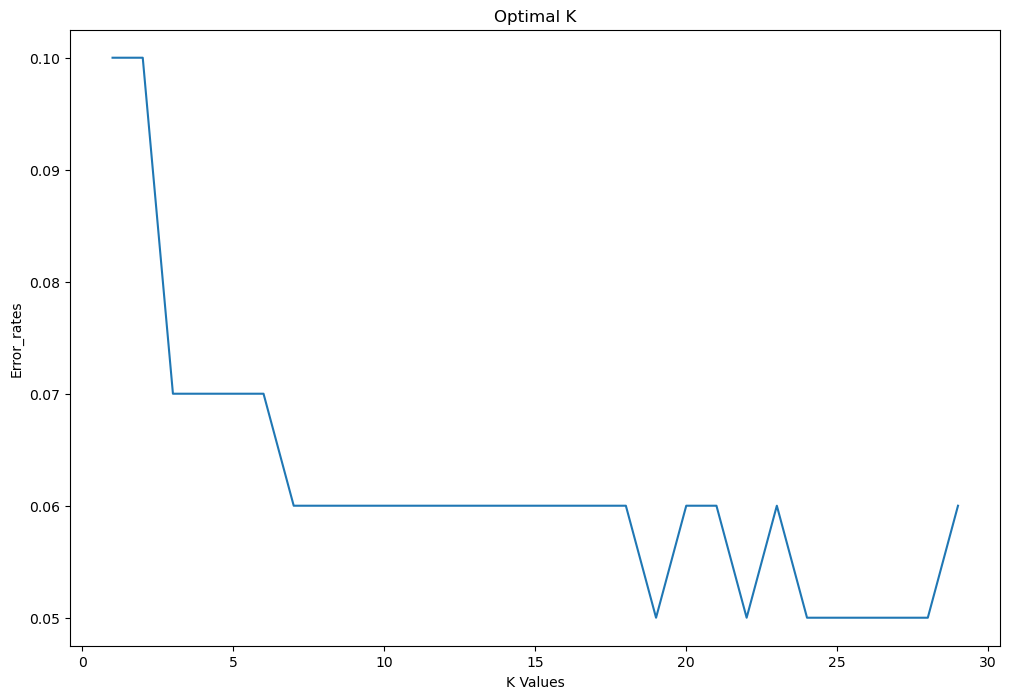

In [31]:
plt.figure(figsize=(12,8))
plt.plot(range(1,30), test_error_rate, label= 'Test Error')
plt.xlabel('K Values')
plt.ylabel('Error_rates')
plt.title('Optimal K')
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
knn= KNeighborsClassifier()

In [39]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [40]:
operations =[('scalar',scaler),('knn',knn)]

In [42]:
from sklearn.pipeline import Pipeline

In [43]:
pipe=Pipeline (operations)

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
k_values = list(range(1,20)) 
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

### Note : If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:*

- chosen_string_name + two underscores + parameter key name
- model_name + __ + parameter name
- knn_model + __ + n_neighbors
- knn_model__n_neighbors

StackOverflow on this

The reason we have to do this is because it let's scikit-learn know what operation in the pipeline these parameters are related to (otherwise it might think n_neighbors was a parameter in the scaler)

In [53]:
# we should add double underscore after k for getting output
param_grid ={'knn__n_neighbors':k_values}

In [51]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [52]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [56]:

full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scalar', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scalar': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scalar__copy': True,
 'scalar__with_mean': True,
 'scalar__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [58]:
#gives result of the dictonary keys
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [59]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.90380952, 0.90714286, 0.92142857, 0.91380952, 0.92380952,
       0.92047619, 0.92761905, 0.9252381 , 0.9247619 , 0.92285714,
       0.9252381 , 0.92428571, 0.92761905, 0.92809524, 0.92857143,
       0.93      , 0.92904762, 0.92857143, 0.92761905])